# Classification of EMOTIV EPOC 3 classes

## Import Library

In [4]:
import sys
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
print(sys.executable)

/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/bin/python


In [5]:
import torch
print(torch.cuda.is_available()) 

True


## Data Ingestion from Kaggle

In [6]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset path
kaggle_dataset = 'drammaraalhamadani/emotiv-epoc-3-classes'
output_dir = './kaggle_downloads'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and unzip all files from the Kaggle dataset (download everything at once)
print("Downloading and unzipping all files from the dataset...")
api.dataset_download_files(kaggle_dataset, path=output_dir, force=True, unzip=True)
print("All files downloaded and unzipped to:", output_dir)

Dataset URL: https://www.kaggle.com/datasets/drammaraalhamadani/emotiv-epoc-3-classes
All files downloaded and unzipped to: ./kaggle_downloads


## Data Collection


### user_a

In [7]:
a = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_a.csv")
print(a.head(3))
print(a.shape)
print(a.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3569.164550  2063.892754  1.673726  4.444736  0.526209  3.002088   
1    1.0  3568.423670  2063.099248  1.897790  3.728823  1.304186  1.854353   
2    1.0  3568.157929  2062.445859  2.798014  2.574504  1.120537  1.958819   

      AF3.6     AF3.7           F7  ...       F8.6       F8.7          AF4  \
0  1.425022  3.302739  3563.803888  ...  45.468326  72.508750  3701.186330   
1  1.366575  2.546458  3563.560922  ...  36.551948  66.931186  3725.210509   
2  0.982433  2.258622  3563.279981  ...  40.754308  66.816547  3724.417296   

         AF4.1      AF4.2      AF4.3      AF4.4      AF4.5      AF4.6  \
0  2182.676835  18.192418  41.349662  16.004756  42.046467  46.280843   
1  2180.197439   8.820788  38.012788  19.601233  29.431054  38.559351   
2  2176.823208  18.159202  23.612639  14.378291  19.555084  43.210004   

       AF4.7  
0  73.565719  
1  67.470041  
2  67.781924  

[3 rows x 113 column

### user_b

In [8]:
b = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_b.csv")
print(b.head(3))
print(b.shape)
print(b.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    2.0  3577.872723  2067.408557  1.025738  1.744496  0.883469  1.282893   
1    2.0  3577.830179  2066.857321  0.573598  1.711991  1.012575  1.900513   
2    2.0  3576.706494  2066.736837  0.525896  1.584096  0.201467  1.038686   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.039058  2.730998  3568.553050  ...     NaN     NaN     NaN      NaN   
1  2.746218  3.066821  3569.060181  ...     NaN     NaN     NaN      NaN   
2  2.685631  2.977552  3569.214969  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_c

In [9]:
c = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_c.csv")
print(c.head(3))
print(c.shape)
print(c.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3573.336166  2067.827798  1.334973  2.294574  0.742210  2.052755   
1    1.0  3569.424197  2063.871329  1.639684  2.573080  1.097168  2.678287   
2    1.0  3570.767652  2064.654687  0.706498  2.613442  1.086770  2.222977   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.604952  4.854279  3575.508401  ...     NaN     NaN     NaN      NaN   
1  2.313650  4.727548  3573.524571  ...     NaN     NaN     NaN      NaN   
2  2.409857  4.936480  3573.935350  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_d

In [10]:
d = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_d.csv")
print(d.head(3))
print(d.shape)
print(d.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3566.375438  2062.665095  1.040973  2.574824  1.376404  1.657806   
1    1.0  3565.986713  2061.826341  1.347088  2.154989  0.904145  2.603965   
2    1.0  3566.977885  2062.639807  1.083747  2.186981  1.155864  2.293261   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  0.933377  2.429998  3564.653552  ...     NaN     NaN     NaN      NaN   
1  1.175508  2.292886  3564.071577  ...     NaN     NaN     NaN      NaN   
2  1.144330  2.107225  3564.207493  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

## Data Cleaning

### Data Profiling

In [11]:
# import _bz2
# from ydata_profiling import ProfileReport
# profile = ProfileReport(b)
# profile.to_file("report.html")

### Missing value

In [12]:
print(b.isnull().sum().sum()) 

2623680


T8.71     100.0
FC6.64    100.0
FC6.65    100.0
FC6.66    100.0
FC6.67    100.0
          ...  
O2.2        0.0
O2.3        0.0
O2.4        0.0
O2.5        0.0
O2.6        0.0
Length: 1024, dtype: float64


<Axes: >

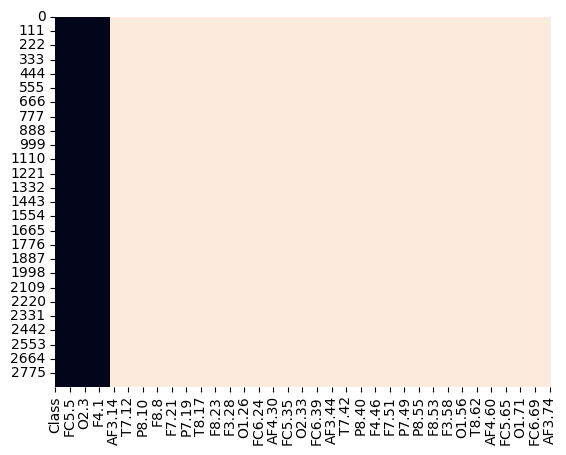

In [13]:
# Kiểm tra tỷ lệ missing theo cột
missing_ratio = b.isnull().sum() / len(b) * 100
print(missing_ratio.sort_values(ascending=False))

# Kiểm tra pattern missing (dùng heatmap)
import seaborn as sns
sns.heatmap(b.isnull(), cbar=False)

Bước	Mức độ quan trọng	Khi nào cần?
1. Missing Values	⭐⭐⭐⭐⭐	Luôn cần
2. Categorical Encoding	⭐⭐⭐⭐⭐	Nếu có categorical data
3. Outliers	⭐⭐⭐⭐	Với thuật toán nhạy cảm (SVM, Logistic)
4. Scaling	⭐⭐⭐⭐	Với KNN, SVM, Neural Networks
5. Imbalanced Data	⭐⭐⭐	Nếu lớp mất cân bằng nặng
6. Duplicates	⭐⭐	Nếu dữ liệu có trùng lặp
7. Feature Correlation	⭐⭐	Nếu có features tương quan cao
8. Text Cleaning	⭐	Chỉ khi có text data
9. Datetime Handling	⭐	Chỉ khi có ngày tháng